In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=67)

WAVE environment created.


In [3]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 128
model = ppo_unite.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [4]:
save_path = f'./results/env01/ppo/512-128-ppounite-normalize-500'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Error(s) in loading state_dict for ActorCritic:
	Missing key(s) in state_dict: "critic.2.weight", "critic.2.bias", "actor.2.weight", "actor.2.bias". 
	size mismatch for critic.0.weight: copying a param with shape torch.Size([1, 512]) from checkpoint, the shape in current model is torch.Size([512, 512]).
	size mismatch for critic.0.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for actor.0.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([512, 512]).
	size mismatch for actor.0.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([512]).
No model available
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


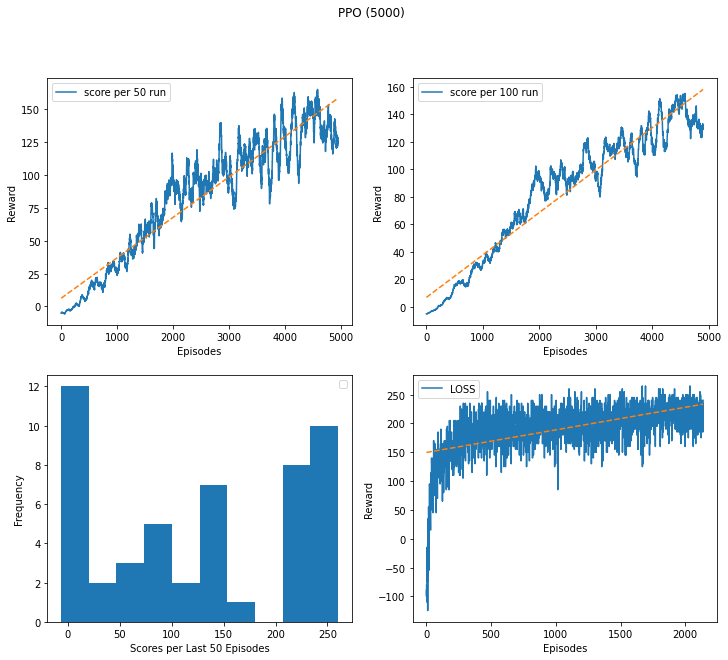

Model saved
Training history saved
saved to ./results/env01/ppo/512-128-ppounite-normalize
epoch: 4999, total timestep: 2139526, total reward: 111.80998884141445, timestep: 464, lr: 3.4867844010000016e-05


In [6]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

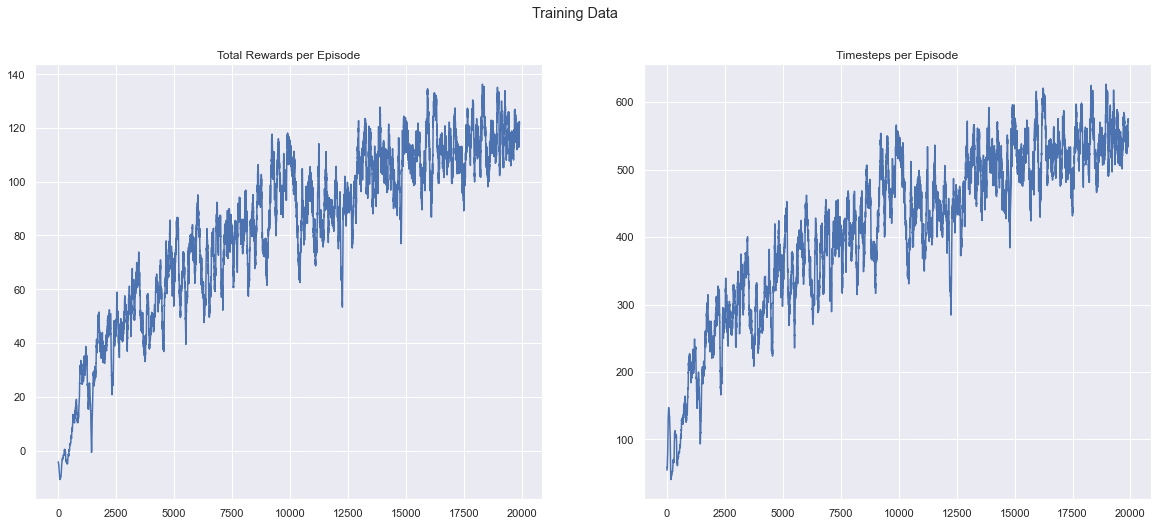

In [6]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [7]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale, worker_id=4), 100, 40)

WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environ

(134.37758179724216, 643.83)

In [4]:
env.close()